In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [ ]:
data=pd.read_csv("AirPassengers.csv")

# New section

In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)

<ipython-input-5-9b71f5305629>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)


In [ ]:
data=data.set_index(['Month'])

In [ ]:
from datetime import datetime
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


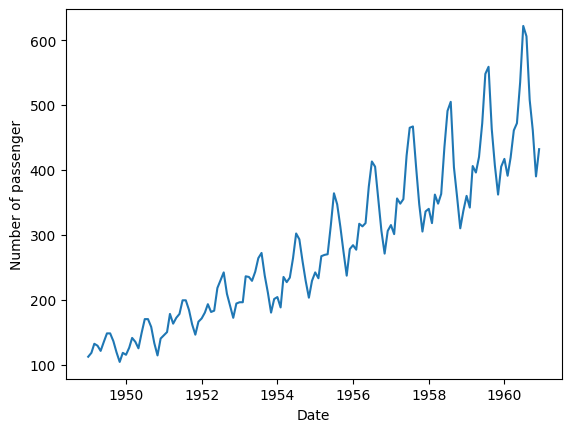

In [ ]:
plt.xlabel('Date')
plt.ylabel('Number of passenger')
plt.plot(data)

In [ ]:
rolmean=data.rolling(window=12).mean()
rolstd=data.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


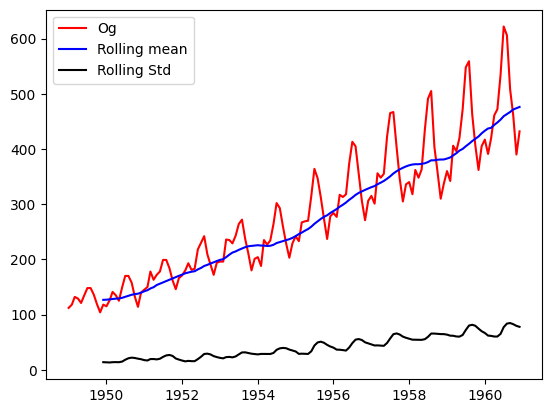

In [ ]:
#rolling stat
orginal=plt.plot(data, color='red', label ='Og')
mean=plt.plot(rolmean, color='blue', label="Rolling mean")
std=plt.plot(rolstd, color='black', label="Rolling Std")
plt.legend(loc='best')
plt.show()


# we use # conclude the data is not stationary

In [ ]:
def plot_graph(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    orginal = plt.plot(timeseries, color='red', label ='Og')
    mean = plt.plot(rolmean, color='blue', label="Rolling mean")
    std = plt.plot(rolstd, color='black', label="Rolling Std")

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and standard deviation')
    plt.show()


In [ ]:
def adcf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(timeseries)
    print(dftest)

In [ ]:
adcf_test(data)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [ ]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()

    orginal = plt.plot(timeseries, color='red', label ='Og')
    mean = plt.plot(rolmean, color='blue', label="Rolling mean")
    std = plt.plot(rolstd, color='black', label="Rolling Std")

    plt.legend(loc='best')
    plt.title('Timeseries data with rolling mean and standard deviation')
    plt.show()
    from statsmodels.tsa.stattools import adfuller
    dftest=adfuller(timeseries)
    dfoutput=pd.Series(dftest[0:4],index=['The test Statistic','Mackinnons approximate p-value','#usedlags','NOBS'])
    print(dfoutput)


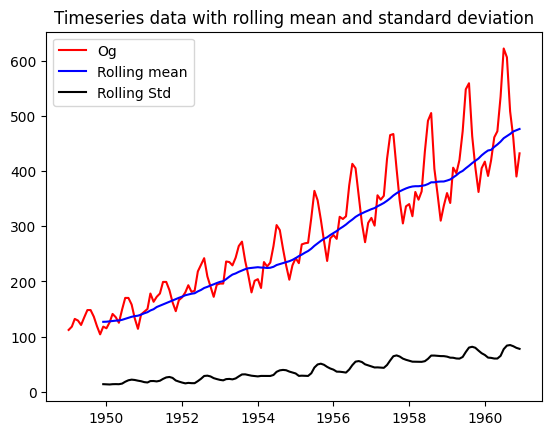

The test Statistic                  0.815369
Mackinnons approximate p-value      0.991880
#usedlags                          13.000000
NOBS                              130.000000
dtype: float64


In [ ]:
test_stationarity(data)

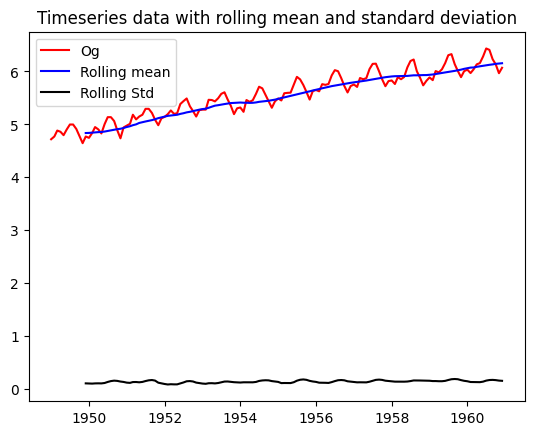

The test Statistic                 -1.717017
Mackinnons approximate p-value      0.422367
#usedlags                          13.000000
NOBS                              130.000000
dtype: float64


In [ ]:
import numpy as np
data_log_scaled=np.log(data)
test_stationarity(data_log_scaled)

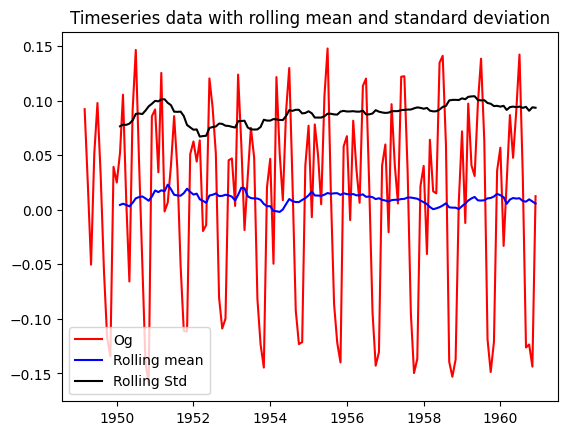

The test Statistic                 -3.040034
Mackinnons approximate p-value      0.031321
#usedlags                          11.000000
NOBS                              130.000000
dtype: float64


In [ ]:
ma=data_log_scaled.rolling(window=3).mean()
data_log_scaled_minus_ma=data_log_scaled-ma
data_log_scaled_minus_ma.dropna(inplace=True)
test_stationarity(data_log_scaled_minus_ma)

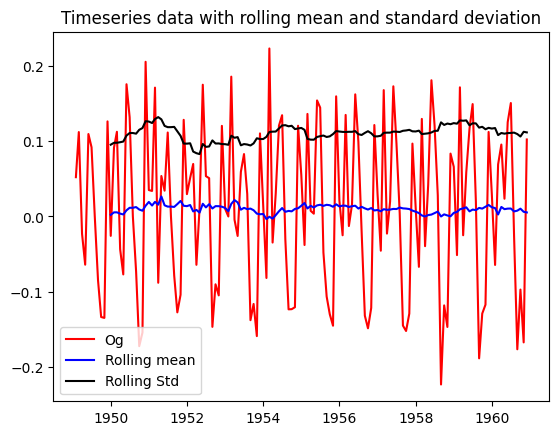

The test Statistic                 -2.717131
Mackinnons approximate p-value      0.071121
#usedlags                          14.000000
NOBS                              128.000000
dtype: float64


In [ ]:
data_log_scaled_ps=data_log_scaled.diff(periods=1)
data_log_scaled_ps.dropna(inplace=True)
test_stationarity(data_log_scaled_ps)

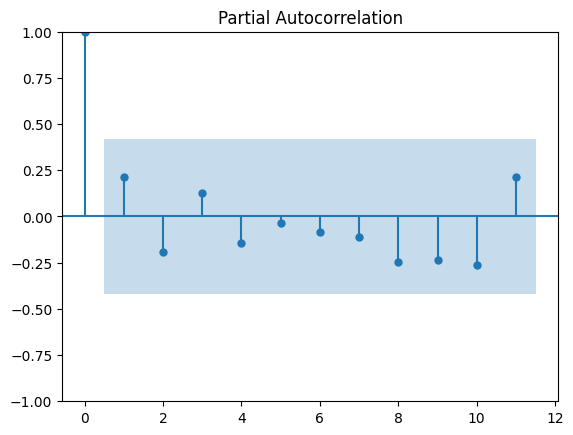

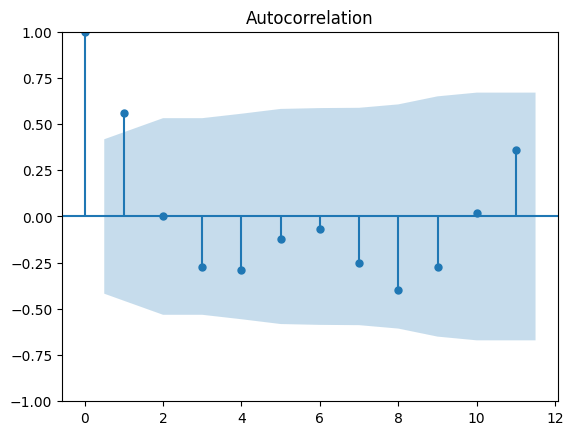

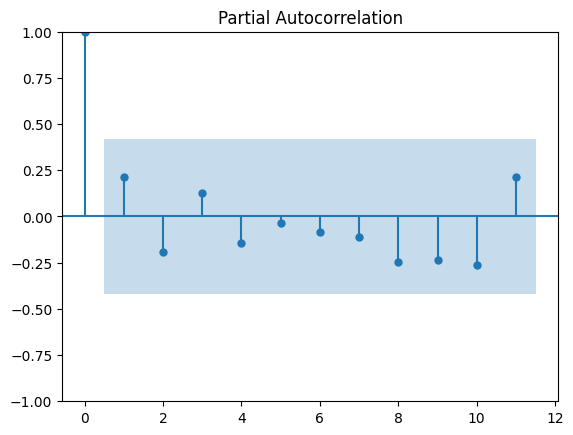

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

lag_acf = acf(data_log_scaled_minus_ma)
lag_pacf = pacf(data_log_scaled_minus_ma)

plot_acf(lag_acf)
plot_pacf(lag_pacf)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split

data_log_scaled_minus_ma.dropna(inplace=True)

train,test=train_test_split(data_log_scaled_minus_ma,test_size=0.10, shuffle = False)
#ARIMA
model_arima= ARIMA(train, order=(20,2,1))
#AR
#model_arima= ARIMA(train, order=(20,2,0))
#MA
#model_arima= ARIMA(train, order=(0,2,1))
#ARMA
#model_arima= ARIMA(train, order=(20,0,1))


model_arima_fit= model_arima.fit()

predictions= model_arima_fit.predict(start='1959-10-01', end='1960-12-01',dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

In [ ]:
test.tail()

,#Passengers
Month,
1960-08-01,0.032851
1960-09-01,-0.126286
1960-10-01,-0.123522
1960-11-01,-0.143862
1960-12-01,0.012435


In [ ]:
from sklearn.metrics import mean_squared_error

error=mean_squared_error(test, predictions)

print('Test MSE %.5f' %error)

Test MSE 0.00142


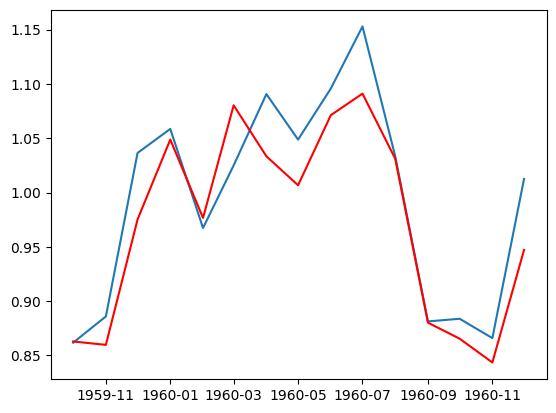

In [ ]:
predict= np.exp(predictions)
test_set=np.exp(test)

plt.plot(test_set)
plt.plot(predict,color='red')
plt.show()

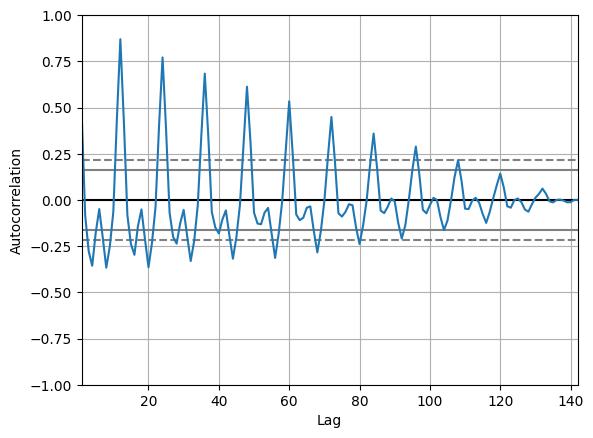

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_log_scaled_minus_ma)
plt.show()

<Axes: ylabel='Density'>

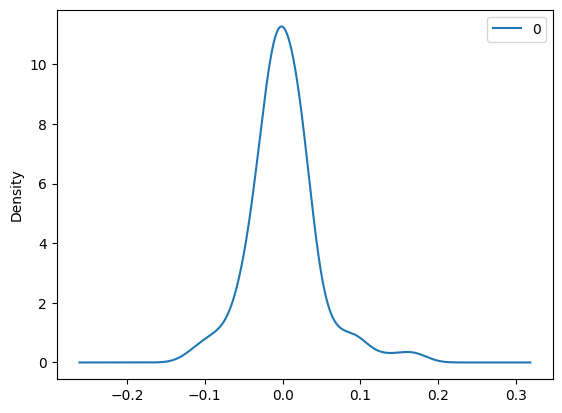

In [ ]:
from pandas import DataFrame

residual=DataFrame(model_arima_fit.resid)

residual.plot(kind='kde')
#More Concentrated at Zero